In [29]:
# Python Packages
import numpy as np
import matplotlib.pyplot as plt
import random
import math

In [30]:
# Creating inputs
X = [1, 0]
# target
y = 1

In [31]:
# Creating a vector of random weights
w = []
nInputs = 2
for i in range(nInputs):
    w.append(random.uniform(-1, 1))   
print(w)

[-0.07911324643036832, 0.4759390988938239]


In [32]:
# setting the bias
b = random.uniform(-1,1)
b

0.7948386935759468

In [33]:
# defining the activation function (sigmoid)
def sigmoid(x):
    return 1/(1+math.exp(-x))

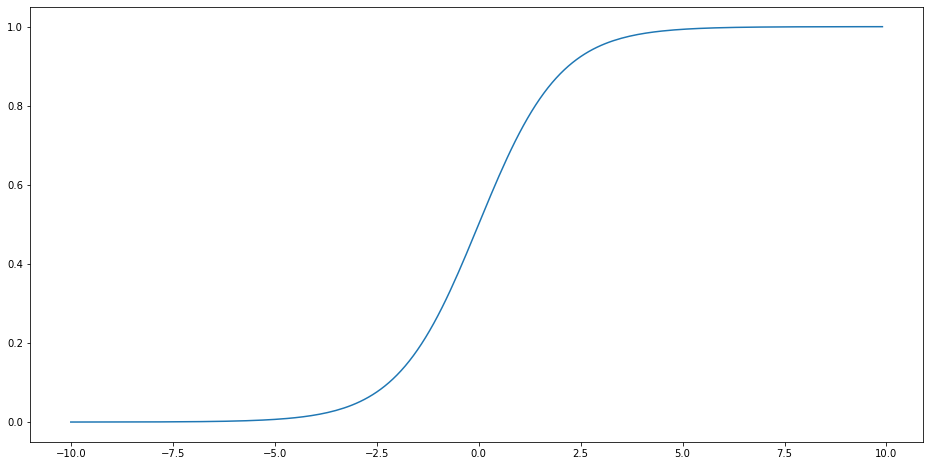

In [34]:
data = [sigmoid(x) for x in np.arange(-10, 10, 0.1)]
plt.figure(figsize=(16,8))
plt.plot(np.arange(-10, 10, 0.1), data)

In [35]:
# calculating the weighted sum
z = sigmoid(np.dot(X, w) + b)
z

0.671665037811999

In [36]:
def activation(z):
    return 1 if z >0.5 else 0
activation(z)

1

In [37]:
# training the perceptron
y_pred = activation(z)
error = y - y_pred
error

0

In [38]:
# update weights
lr = 0.1
w_new = []
for wi, xi in zip(w, X):
    w_new.append(wi + lr*error*xi)

b_new = b + lr*error
w_new, b    

([-0.07911324643036832, 0.4759390988938239], 0.7948386935759468)

In [66]:
# gather everything in the class perceptron
class Perceptron():
    
    def __init__(self,input_size = 2, lr = 0.01, epochs = 20):
        self.lr = lr
        self.epochs = epochs
        self.input_size = input_size
        self.w = np.random.uniform(-1, 1, size=(input_size))
        self.bias = random.uniform(-1,1)
        self.misses = []
        
    def predict(self, X):
        w = self.w
        b = self.bias
        z = sigmoid(np.dot(X,self.w) + b)
        
        if z > 0.5:
            return 1
        else:
            return 0
        
    def fit(self, X, y):
        
        for epoch in range(self.epochs):
            miss = 0
            for yi, xi in zip(y, X):
                y_pred = self.predict(xi)
                error = yi - y_pred
                self.w += self.lr*error*xi
                self.bias += self.lr*error
                miss += int(error != 0.0)
            self.misses.append(miss)
                
        
        

In [40]:
from sklearn import datasets

In [41]:
iris = datasets.load_iris()

In [86]:
X = iris.data
y = iris.target

In [87]:
X.shape

(150, 4)

In [88]:
X = X[:100, [0,2]]
y = y[y<2]
X.shape, y.shape

((100, 2), (100,))

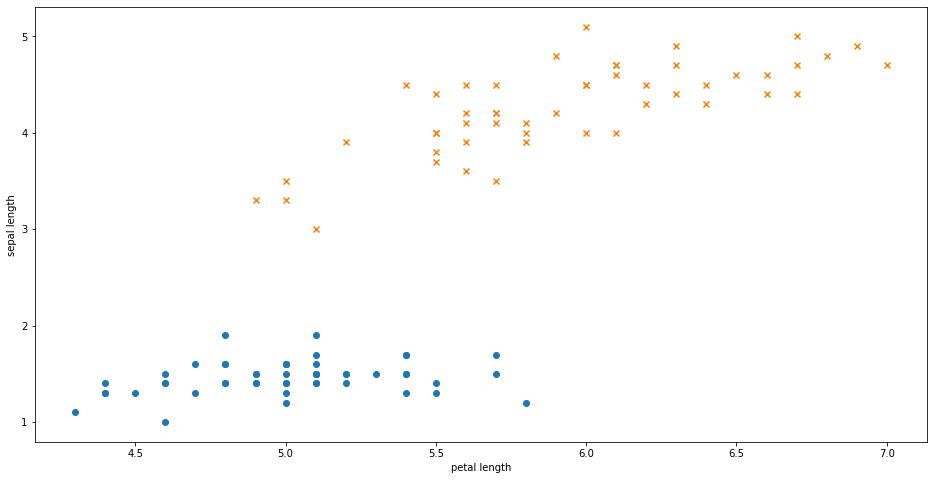

In [90]:
# plot the data
plt.figure(figsize=(16,8))
plt.scatter(X[:50,0], X[:50,1], marker='o', label='setosa')
plt.scatter(X[50:,0], X[50:,1], marker='x', label='virginica')
plt.ylabel('sepal length')
plt.xlabel('petal length')
plt.show()

In [91]:
perceptron = Perceptron(input_size=2)

In [92]:
perceptron.fit(X,y)

In [99]:
perceptron.w, perceptron.bias

(array([0.09893529, 0.09323132]), -0.763184789232628)

-0.763184789232628

In [95]:
perceptron.misses

[12, 9, 7, 8, 6, 3, 4, 3, 3, 2, 3, 2, 2, 1, 0, 0, 0, 0, 0, 0]

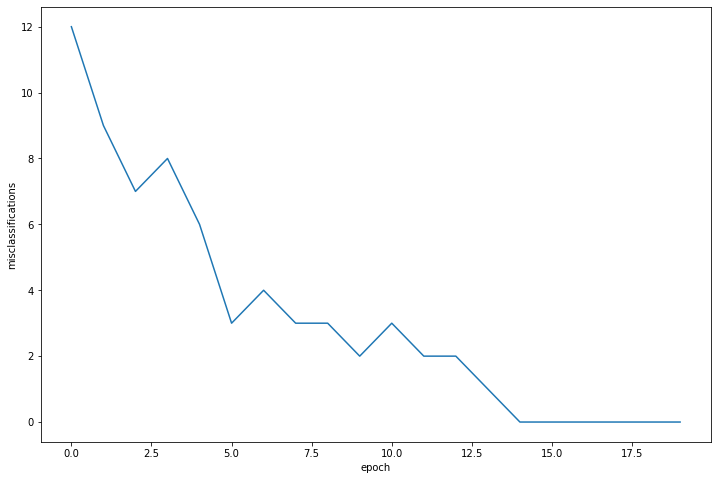

In [98]:
plt.figure(figsize=(12,8))
plt.ylabel('misclassifications')
plt.xlabel('epoch')
plt.plot(np.arange(0, len(perceptron.misses)), perceptron.misses)